The most important file, which load and train the model, and then generate the sequences. Also can plot the generated data and save it to a .npy file (need to download manually)

In [ ]:
%%capture
!pip install numpy pandas matplotlib torch gretel-synthetics
#install cost about 4 mins

In [ ]:
import numpy as np
import pandas as pd

from gretel_synthetics.timeseries_dgan.dgan import DGAN
from gretel_synthetics.timeseries_dgan.config import DGANConfig, OutputType, Normalization

# Training from a DataFrame

In [ ]:
#FAIL EXAMPLE

# test for 3 dimention
cc=(np.random.random(size=(1000,30)))
# Train the model
model = DGAN(DGANConfig(
    max_sequence_len=30,
    sample_len=3,
    batch_size=5,
    epochs=10,  # For real data sets, 100-1000 epochs is typical
))

model.train_dataframe(
    cc
    #,attribute_columns=["attribute"]
    #,discrete_columns=["attribute"],
)

#df2 = pd.DataFrame(np.random.random(size=(1000,30,3)))
#df2.columns = pd.date_range("2022-01-01", periods=30)
# Include an attribute column
#df["attribute"] = np.random.randint(0, 3, size=1000) #cannot use maybe due to version problem
#df2

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

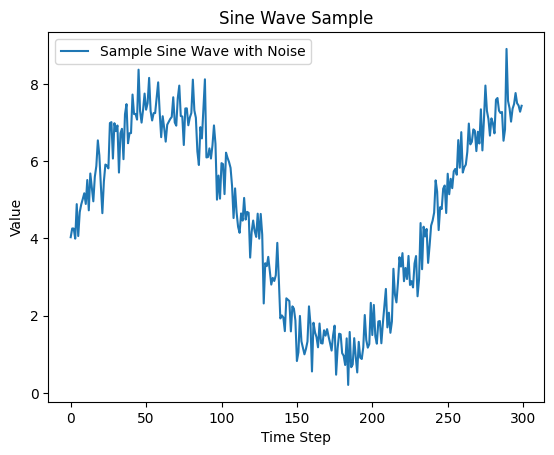

array([[4.03328818, 4.25949636, 4.25719234, ..., 7.44179253, 7.28213035,
        7.43572015],
       [1.99117999, 2.10076827, 1.30622387, ..., 3.25937733, 1.56867105,
        2.64628964],
       [4.33926683, 3.86760883, 4.18194819, ..., 5.03224005, 5.96429123,
        4.8518826 ],
       ...,
       [4.47959304, 4.27260418, 4.2869257 , ..., 6.05604275, 6.55560497,
        6.80936043],
       [3.41810526, 4.32796297, 3.94080537, ..., 5.5189036 , 5.81947331,
        5.82792085],
       [4.431024  , 4.55893362, 5.6111205 , ..., 8.61948321, 8.90586927,
        8.62139029]])

In [ ]:
#E.g. 1 (create a random sine wave to test the generative performance)

amplitudes = np.random.uniform(1, 5, size=1000)  # Generate 1000 random amplitudes between 1 and 5
x = np.linspace(0, 2 * np.pi, 30)  # Generate 300 timesteps
frequencies = np.random.uniform(1, 1.5, size=1000)  # Generate 1000 random frequencies between 1 and 5 cycles
sine_data = np.array(np.abs([amplitudes[i] * np.sin(frequencies[i] * x)+ 1.2*amplitudes[i] + 0.5 + np.random.normal(0, 0.5, 300) for i in range(1000)]))  # Scale sine wave with varying frequencies and add noise
import matplotlib.pyplot as plt
plt.plot(sine_data[0], label="Sample Sine Wave with Noise")
plt.xlabel("Time Step")
plt.ylabel("Value")
plt.title("Sine Wave Sample")
plt.legend()
plt.show()
sine_data


In [ ]:
# Create some random training data data
df = pd.DataFrame(sine_data)
df.columns = pd.date_range("2022-01-01", periods=300)

# Include an attribute column
#df["attribute"] = np.random.randint(0, 3, size=1000) #cannot use maybe due to version problem
print(df.shape)
df

(1000, 300)


,2022-01-01,2022-01-02,2022-01-03,2022-01-04,2022-01-05,2022-01-06,2022-01-07,2022-01-08,2022-01-09,2022-01-10,...,2022-10-18,2022-10-19,2022-10-20,2022-10-21,2022-10-22,2022-10-23,2022-10-24,2022-10-25,2022-10-26,2022-10-27
0,4.033288,4.259496,4.257192,3.996197,4.889831,4.063681,4.686034,4.883542,5.021770,5.171224,...,7.561285,7.375312,7.025502,7.356916,7.480538,7.765337,7.501739,7.441793,7.282130,7.435720
1,1.991180,2.100768,1.306224,1.673661,2.900335,1.760443,1.564053,1.830114,1.561075,2.256720,...,2.563235,2.954867,3.163771,2.327206,2.536395,3.051743,2.825677,3.259377,1.568671,2.646290
2,4.339267,3.867609,4.181948,4.726499,4.355800,4.931519,4.315743,4.383638,4.693658,4.460646,...,5.290014,5.904055,4.787787,5.741695,4.595333,5.217121,5.422654,5.032240,5.964291,4.851883
3,4.312720,3.445116,3.186905,3.654448,3.339467,2.824301,2.932916,3.336305,2.941527,3.314608,...,2.558122,3.182634,2.685969,2.814720,2.564140,3.271067,3.175893,4.381219,2.429379,2.179637
4,4.277751,3.169082,3.813548,3.409399,4.416145,3.261996,3.938549,3.547294,4.398532,4.215878,...,5.137525,5.001107,4.238421,4.976147,6.350028,5.392830,5.475057,4.520395,4.352641,5.732264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2.278141,1.576964,2.132962,1.763383,2.581067,1.385470,1.775571,1.853948,2.166776,2.478184,...,1.374843,1.473516,1.966099,1.877218,1.512056,2.059354,1.669125,1.691622,1.806246,1.883980
996,1.327776,2.196005,2.766259,2.188936,4.225602,2.652470,2.369100,3.077343,2.530780,3.752280,...,3.191365,3.028682,3.383881,3.245345,3.234063,3.536673,3.821450,3.851512,3.137904,3.412896
997,4.479593,4.272604,4.286926,4.123243,5.475883,4.300835,4.369100,4.945489,4.250972,4.944300,...,7.102902,5.920870,6.075843,7.713701,6.273114,6.826793,6.377945,6.056043,6.555605,6.809360
998,3.418105,4.327963,3.940805,4.433391,4.258293,3.670658,4.265620,3.500790,4.786300,5.001989,...,4.885101,4.861556,5.621690,5.721517,5.041951,6.327945,6.208643,5.518904,5.819473,5.827921


In [ ]:
# Train the model
# (1000,30)    max_sequence_len=30,sample_len=3,batch_size=1000,epochs=500 Time:19min
# 6 min for 1000,300 100epochs
model = DGAN(DGANConfig(
    #generator_learning_rate=10e-2,
    #discriminator_learning_rate=10e-2,

    max_sequence_len=30,
    sample_len=5,
    use_attribute_discriminator=True,
    gradient_penalty_coef=10.0,
    attribute_gradient_penalty_coef=10.0,
    generator_learning_rate=1e-3,
    discriminator_learning_rate=1e-3,
    attribute_discriminator_learning_rate=1e-3,
    attribute_loss_coef=1.0,
    apply_feature_scaling=True,
    apply_example_scaling=True,
    normalization=Normalization.MINUSONE_ONE,
    batch_size=1000,
    epochs=2000,
))

model.train_dataframe(
    df
    #,attribute_columns=["attribute"]
    #,discrete_columns=["attribute"],
)



/usr/local/lib/python3.11/dist-packages/gretel_synthetics/timeseries_dgan/dgan.py:688: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler(enabled=self.config.mixed_precision_training)
/usr/local/lib/python3.11/dist-packages/gretel_synthetics/timeseries_dgan/dgan.py:696: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(
/usr/local/lib/python3.11/dist-packages/gretel_synthetics/timeseries_dgan/dgan.py:719: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=True):
/usr/local/lib/python3.11/dist-packages/gretel_synthetics/timeseries_dgan/dgan.py:743: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` inst

In [ ]:
# Generate synthetic data
synthetic_df = model.generate_dataframe(1000)
#synthetic_df

In [ ]:
print(synthetic_df.shape)

(1000, 300)


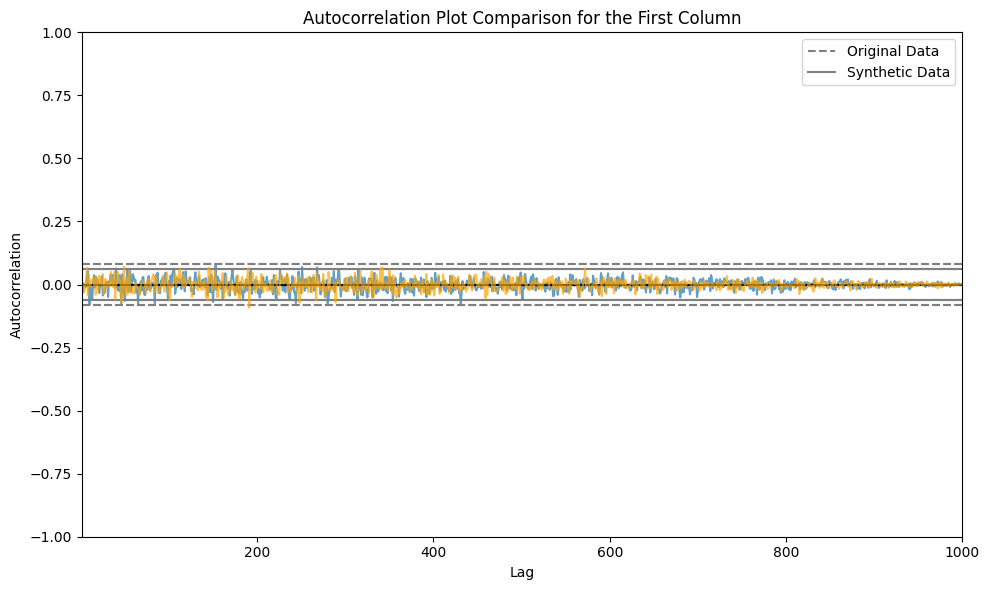

In [ ]:
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt

# Adjust transparency and make use of the whole graph
plt.figure(figsize=(10, 6))
autocorrelation_plot(df.iloc[: , 0], label='Original Data', alpha=0.7)  #(1000,1)
autocorrelation_plot(synthetic_df.iloc[: , 0], label='Synthetic Data', color='orange', alpha=0.7)

# Add legend and adjust layout
plt.legend(['Original Data', 'Synthetic Data'])
plt.title('Autocorrelation Plot Comparison for the First Column')
plt.tight_layout()
plt.show()


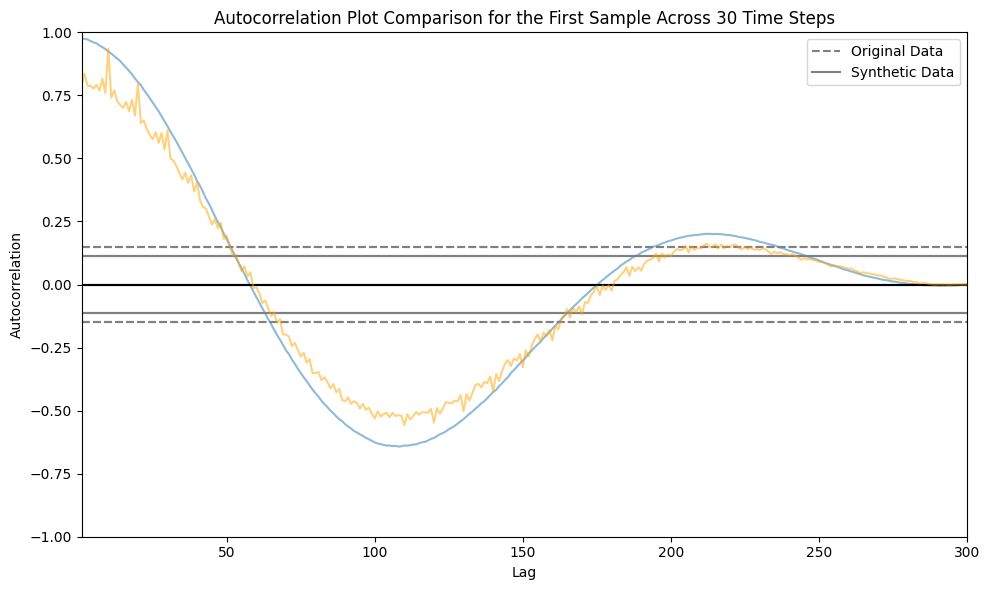

In [ ]:


# Adjust transparency and make use of the whole graph
plt.figure(figsize=(10, 6))
autocorrelation_plot(df.iloc[0 , :], label='Original Data', alpha=0.5) #(1,30)
autocorrelation_plot(synthetic_df.iloc[0 , :], label='Synthetic Data', color='orange', alpha=0.5)

# Add legend and adjust layout
plt.legend(['Original Data', 'Synthetic Data'])
plt.title('Autocorrelation Plot Comparison for the First Sample Across 30 Time Steps')
plt.tight_layout()
plt.show()


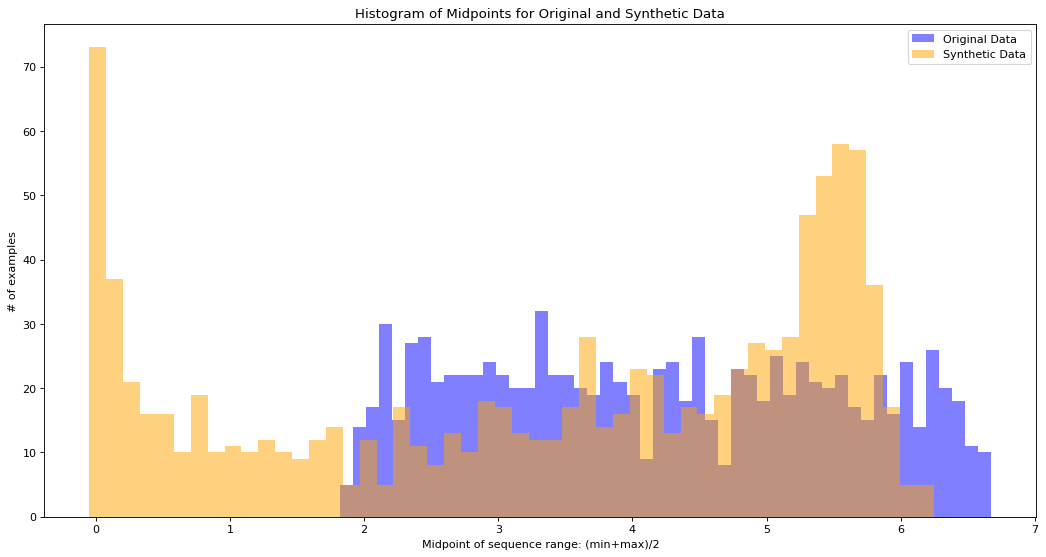

In [ ]:
# Calculate midpoints for original and synthetic data
original_midpoints = (df.min(axis=1) + df.max(axis=1)) / 2
synthetic_midpoints = (synthetic_df.min(axis=1) + synthetic_df.max(axis=1)) / 2

# Plot histogram of midpoints
plt.figure(figsize=(16, 8), dpi=80)
plt.hist(original_midpoints, bins=50, alpha=0.5, label="Original Data", color='blue')
plt.hist(synthetic_midpoints, bins=50, alpha=0.5, label="Synthetic Data", color='orange')

# Add labels, title, and legend
plt.xlabel("Midpoint of sequence range: (min+max)/2")
plt.ylabel("# of examples")
plt.title("Histogram of Midpoints for Original and Synthetic Data")
plt.legend(loc="upper right")

# Save and display the plot
plt.savefig("midpoints.png")
plt.show()

Visualizing the best sample with index: 579
(1000, 300)
(1000, 300)
(300,)
(300,)


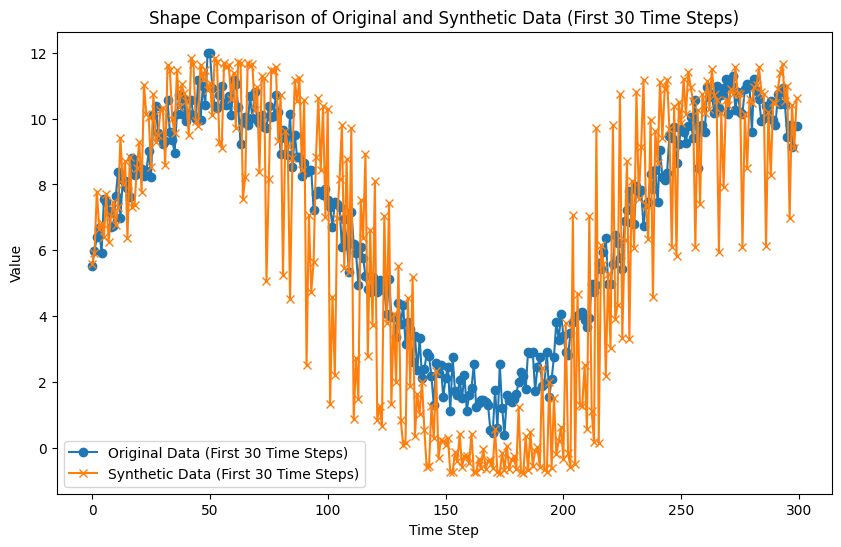

In [ ]:
#1000 to 1 match
# Find best samples by comparing the sum of absolute differences between original and synthetic data
differences = [np.sum(np.square(df.iloc[i, :-1].values - synthetic_df.iloc[0, :-1].values)) for i in range(len(df))]
best_samples = np.argsort(differences)[:1000]#1-1000

#print("Indices of x best samples:", best_samples)
#print(len(differences))
import matplotlib.pyplot as plt

# Visualize the distribution of a column from the original and synthetic datasets for the best sample
number_x=0 ###### 0 - 999 , 0 represent the most similar generated result, 999 the least similar
random_number = best_samples[number_x]
print(f"Visualizing the best sample with index: {random_number}")

original_column = df.iloc[random_number, :]  # Exclude the attribute column
synthetic_column = synthetic_df.iloc[0, :]  # Exclude the attribute column
print(df.shape)
print(synthetic_df.shape)
print(original_column.shape)
print(synthetic_column.shape)

# Overlay the shapes of the original and synthetic data
plt.figure(figsize=(10, 6))
plt.plot(original_column.values[:], label='Original Data (First 30 Time Steps)', marker='o')
plt.plot(synthetic_column.values[:], label='Synthetic Data (First 30 Time Steps)', marker='x')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.title('Shape Comparison of Original and Synthetic Data (First 30 Time Steps)')
plt.legend()


Visualizing the best sample with index: 803
(1000, 300)
(1000, 300)
(300,)
(300,)


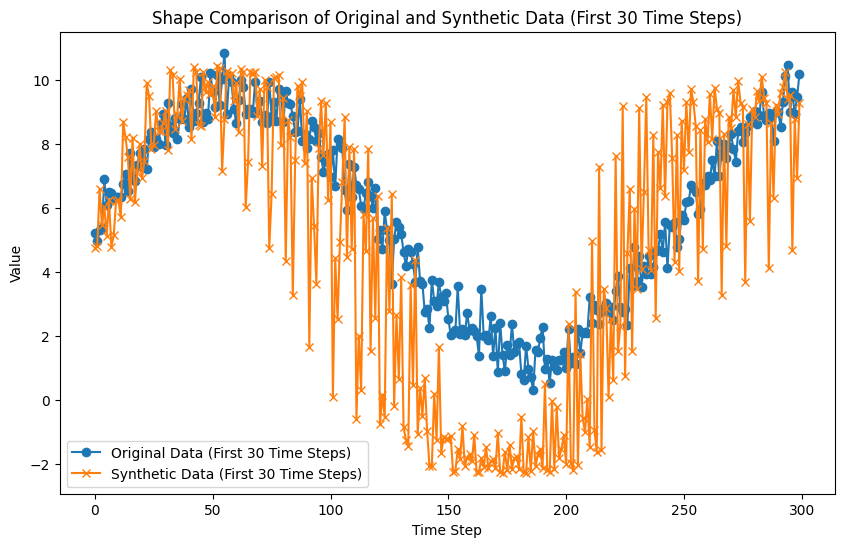

In [ ]:
#1 to 1 match
# Find best samples by comparing the sum of absolute differences between original and synthetic data
differences = [np.sum(np.square(df.iloc[i, :-1].values - synthetic_df.iloc[i, :-1].values)) for i in range(len(synthetic_df))]
best_samples = np.argsort(differences)[:1000]#1-1000

#print("Indices of x best samples:", best_samples)
#print(len(differences))
import matplotlib.pyplot as plt

# Visualize the distribution of a column from the original and synthetic datasets for the best sample
number_x=99  ###### 0 - 999 , 0 represent the most similar generated result, 999 the least similar
random_number = best_samples[number_x]
print(f"Visualizing the best sample with index: {random_number}")

original_column = df.iloc[random_number, :]  # Exclude the attribute column
synthetic_column = synthetic_df.iloc[random_number, :]  # Exclude the attribute column
print(df.shape)
print(synthetic_df.shape)
print(original_column.shape)
print(synthetic_column.shape)

# Overlay the shapes of the original and synthetic data
plt.figure(figsize=(10, 6))
plt.plot(original_column.values[:], label='Original Data (First 30 Time Steps)', marker='o')
plt.plot(synthetic_column.values[:], label='Synthetic Data (First 30 Time Steps)', marker='x')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.title('Shape Comparison of Original and Synthetic Data (First 30 Time Steps)')
plt.legend()


Random number between 0 and 999: 288
(1000, 300)
(1000, 300)
(300,)
(300,)


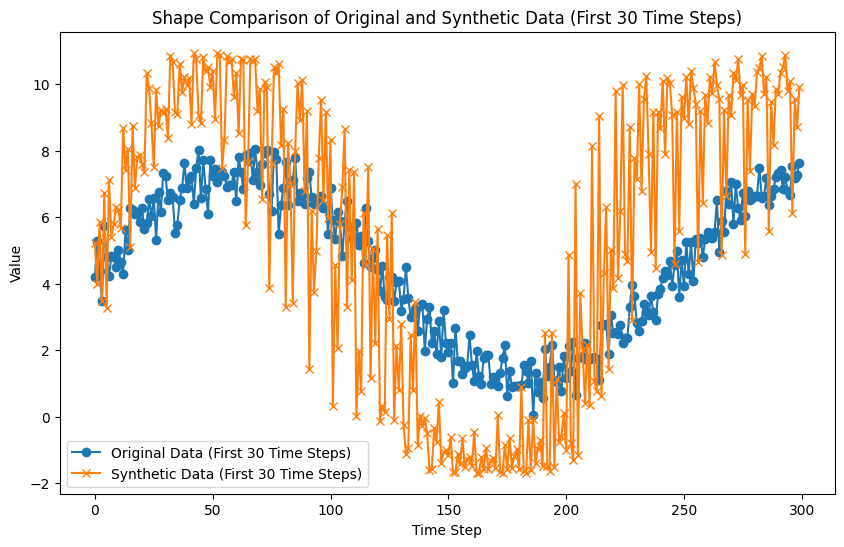

In [ ]:
#plot a random comparison between data and generate result

import matplotlib.pyplot as plt
random_number = np.random.randint(0, 1000)
print(f"Random number between 0 and 999: {random_number}")

# Visualize the distribution of a column from the original and synthetic datasets
original_column = df.iloc[random_number , :]  # Select the first column from the original dataset
synthetic_column = synthetic_df.iloc[ random_number , :]  # Select the first column from the synthetic dataset
print(df.shape)
print(synthetic_df.shape)
print(original_column.shape)
print(synthetic_column.shape)

# Overlay the shapes of the original and synthetic data
plt.figure(figsize=(10, 6))
plt.plot(original_column.values[:], label='Original Data (First 30 Time Steps)', marker='o')
plt.plot(synthetic_column.values[:], label='Synthetic Data (First 30 Time Steps)', marker='x')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.title('Shape Comparison of Original and Synthetic Data (First 30 Time Steps)')
plt.legend()

In [ ]:
# Save the dataframe to a CSV file
df.to_csv("generated_dataframe.csv", index=False)
print("Dataframe saved to 'generated_dataframe.csv'")


In [ ]:
# Load the dataframe from the CSV file
loaded_df = pd.read_csv("generated_dataframe.csv")
print("Dataframe loaded for comparison:")
print(loaded_df.head())

# Training from numpy arrays

In [ ]:
# Create some random training data
#attributes = np.random.randint(0, 2, size=(1000,3))#catergo
#features = np.random.random(size=(1000,20,2))#numer

x = np.linspace(0, 2 * np.pi, 3000)  # Generate 30 timesteps
frequencies = np.random.normal(1.05, 0.1, size=100) # Generate 1000 random frequencies between 1 and 8 cycles
amplitudes = np.random.normal(1.2, 0.1, size=100)  # Generate 1000 random amplitudes between 1 and 5
a=np.random.normal(0, 0.05, 3000)
# Generate sine and cosine waves with noise
features = np.array(np.abs([[
    amplitudes[i] * np.sin(frequencies[i] * x) + a + amplitudes[i],
    amplitudes[i] * np.sin(frequencies[i] * x) + a + amplitudes[i] #cos
] for i in range(100)])).transpose(0, 2, 1)

89


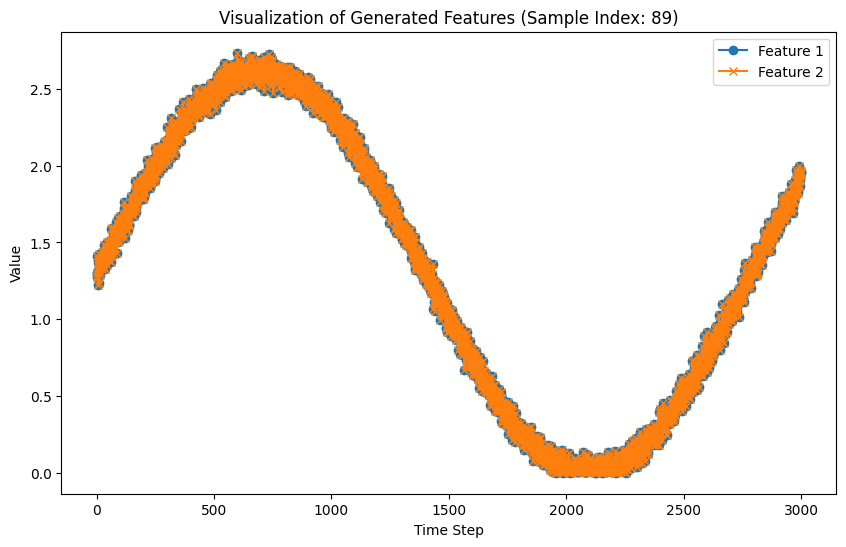

In [ ]:
#Plot the random generate data

import matplotlib.pyplot as plt

# Select a random sample from the generated features
random_index = np.random.randint(0, features.shape[0])
print(random_index)
selected_feature = features[random_index]

# Plot the selected feature
plt.figure(figsize=(10, 6))
plt.plot(selected_feature[:, 0], label='Feature 1', marker='o')
plt.plot(selected_feature[:, 1], label='Feature 2', marker='x')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.title(f'Visualization of Generated Features (Sample Index: {random_index})')
plt.legend()
plt.show()

In [ ]:
#attributes

In [ ]:
#features

#print the np array

In [ ]:
# Train the model
model = DGAN(DGANConfig(
    #generator_learning_rate=10e-2,
    #discriminator_learning_rate=10e-2,

    max_sequence_len=3000,
    sample_len=1000,
    use_attribute_discriminator=True,
    gradient_penalty_coef=10.0,
    attribute_gradient_penalty_coef=10.0,
    generator_learning_rate=1e-3,
    discriminator_learning_rate=1e-3,
    attribute_discriminator_learning_rate=1e-3,
    attribute_loss_coef=1.0,
    apply_feature_scaling=True,
    apply_example_scaling=True,
    normalization=Normalization.MINUSONE_ONE,
    batch_size=500,
    epochs=1000,
))

model.train_numpy(
    #attributes=attributes,
    #attribute_types = [OutputType.DISCRETE] * 3,
    features=features
    #,
    #feature_types = [OutputType.CONTINUOUS] * 2
)



In [ ]:
print(synthetic_features)

[[[1.09229635 1.16240519]
  [1.11034295 1.16241896]
  [1.145681   1.1623863 ]
  ...
  [2.01609664 1.16325257]
  [2.06145923 1.16327714]
  [2.02428624 1.16323871]]

 [[1.20273347 1.15511633]
  [1.22924366 1.15512875]
  [1.25305408 1.15516654]
  ...
  [2.00086689 1.15580408]
  [1.98655192 1.15585096]
  [2.01533232 1.15579175]]

 [[1.11542199 1.16026574]
  [1.15539015 1.16026664]
  [1.18168574 1.16027168]
  ...
  [2.06723907 1.16074481]
  [2.10548467 1.16077919]
  [2.07180592 1.16075309]]

 ...

 [[1.18730414 1.17590059]
  [1.30429963 1.17597393]
  [1.19798746 1.17593686]
  ...
  [1.98361665 1.17665106]
  [2.00875019 1.176648  ]
  [1.96592567 1.17663621]]

 [[1.23757427 1.15456248]
  [1.38226702 1.15458525]
  [1.30154019 1.15464914]
  ...
  [1.83589451 1.15518778]
  [1.86715378 1.15519237]
  [1.89373317 1.15518436]]

 [[1.12750455 1.15667206]
  [1.18862015 1.15676816]
  [1.16366263 1.15678427]
  ...
  [2.03623608 1.15813358]
  [2.07141179 1.15828979]
  [1.99636033 1.15827197]]]


In [ ]:
# Generate synthetic data
#synthetic_attributes, synthetic_features = model.generate_numpy(1000)
synthetic_features_0 = model.generate_numpy(100)


In [ ]:
synthetic_features=synthetic_features_0[1]
print(synthetic_features.shape)

In [ ]:
#Plot the random generate data

import matplotlib.pyplot as plt

# Select a random sample from the generated features
random_index = np.random.randint(0, synthetic_features.shape[0])
print(random_index)
selected_feature = synthetic_features[random_index]

# Plot the selected feature
plt.figure(figsize=(10, 6))
plt.plot(selected_feature[:, 0], label='Feature 1', marker='o')
plt.plot(selected_feature[:, 1], label='Feature 2', marker='x')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.title(f'Visualization of Generated Features (Sample Index: {random_index})')
plt.legend()
plt.show()

100
Visualizing the best sample 51 with index: 54


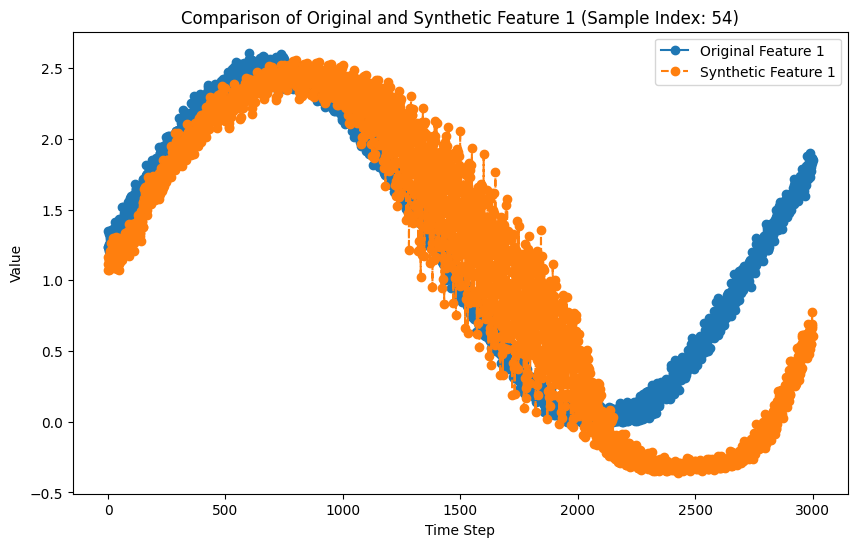

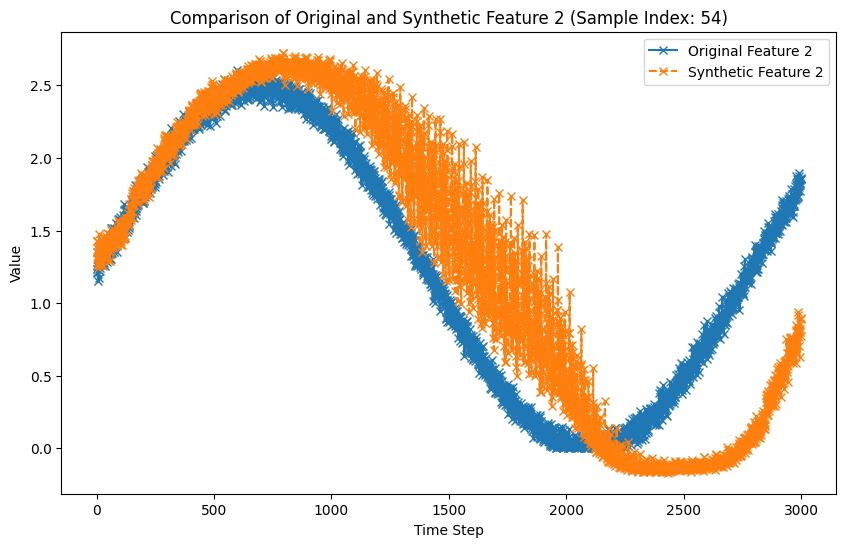

In [ ]:
# Find n best samples by comparing the sum of absolute differences between original and synthetic features
n = 1000  # Number of best samples to find
differences = [np.sum(np.abs(features[i] - synthetic_features[0])) for i in range(len(features))]
best_samples = np.argsort(differences)[:1000]
print(len(best_samples))
# Visualize the original and synthetic features for the best samples
import matplotlib.pyplot as plt

#for idx, sample_index in enumerate(best_samples):
x=50
y=best_samples[x]

print(f"Visualizing the best sample {x + 1} with index: {y}")
original_feature = features[y]
synthetic_feature = synthetic_features[0]

# Plot Feature 1
plt.figure(figsize=(10, 6))
plt.plot(original_feature[:, 0], label='Original Feature 1', marker='o')
plt.plot(synthetic_feature[:, 0], label='Synthetic Feature 1', linestyle='--', marker='o')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.title(f'Comparison of Original and Synthetic Feature 1 (Sample Index: {y})')
plt.legend()
plt.show()

# Plot Feature 2
plt.figure(figsize=(10, 6))
plt.plot(original_feature[:, 1], label='Original Feature 2', marker='x')
plt.plot(synthetic_feature[:, 1], label='Synthetic Feature 2', linestyle='--', marker='x')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.title(f'Comparison of Original and Synthetic Feature 2 (Sample Index: {y})')
plt.legend()
plt.show()

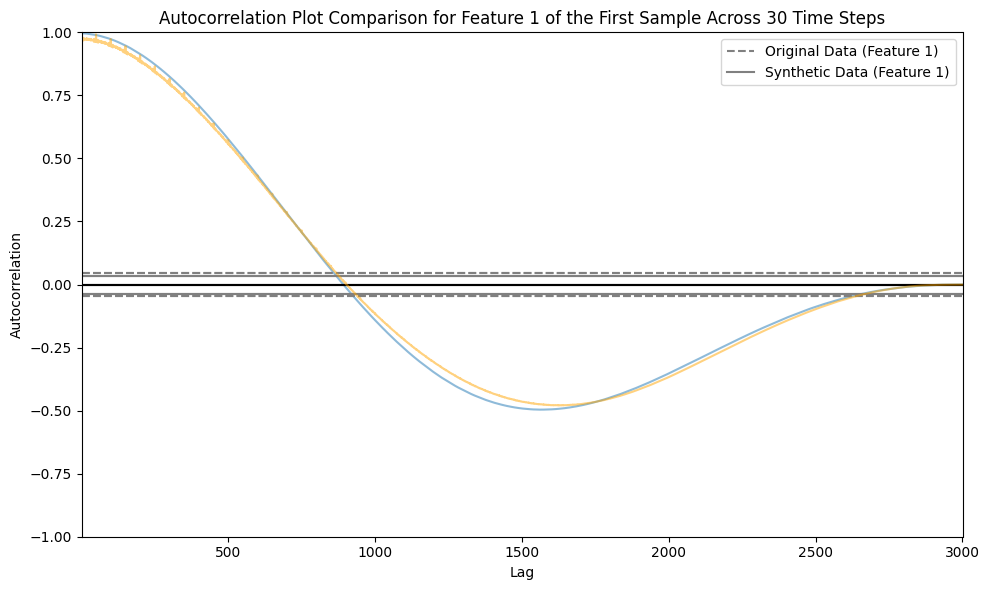

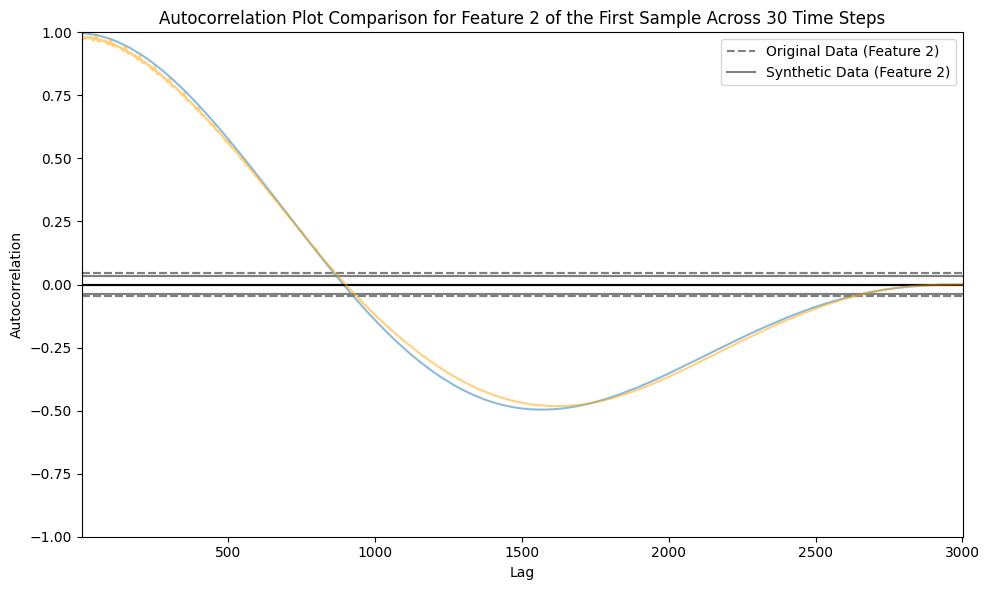

In [ ]:

#comparison test
#1 auto
# Adjust transparency and make use of the whole graph for the new data format


from pandas.plotting import autocorrelation_plot
plt.figure(figsize=(10, 6))
autocorrelation_plot(pd.Series(features[0, :, 0]), label='Original Data (Feature 1)', alpha=0.5)
autocorrelation_plot(pd.Series(synthetic_features[0, :, 0]), label='Synthetic Data (Feature 1)', color='orange', alpha=0.5)

# Add legend and adjust layout for Feature 1
plt.legend(['Original Data (Feature 1)', 'Synthetic Data (Feature 1)'])
plt.title('Autocorrelation Plot Comparison for Feature 1 of the First Sample Across 30 Time Steps')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
autocorrelation_plot(pd.Series(features[0, :, 1]), label='Original Data (Feature 2)', alpha=0.5)
autocorrelation_plot(pd.Series(synthetic_features[0, :, 1]), label='Synthetic Data (Feature 2)', color='orange', alpha=0.5)

# Add legend and adjust layout for Feature 2
plt.legend(['Original Data (Feature 2)', 'Synthetic Data (Feature 2)'])
plt.title('Autocorrelation Plot Comparison for Feature 2 of the First Sample Across 30 Time Steps')
plt.tight_layout()
plt.show()


New shape: (3000, 2)
New shape: (3000, 2)


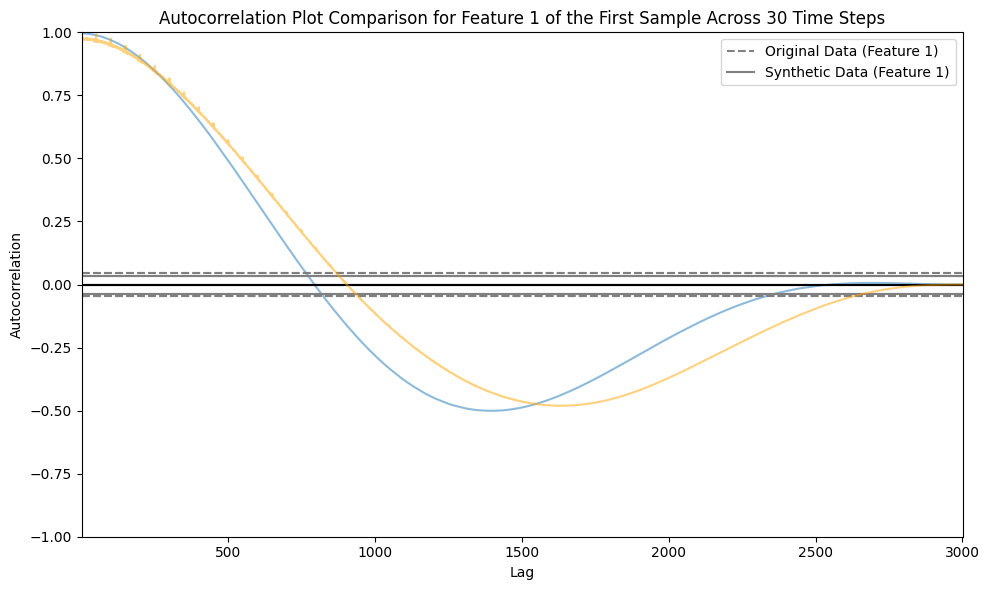

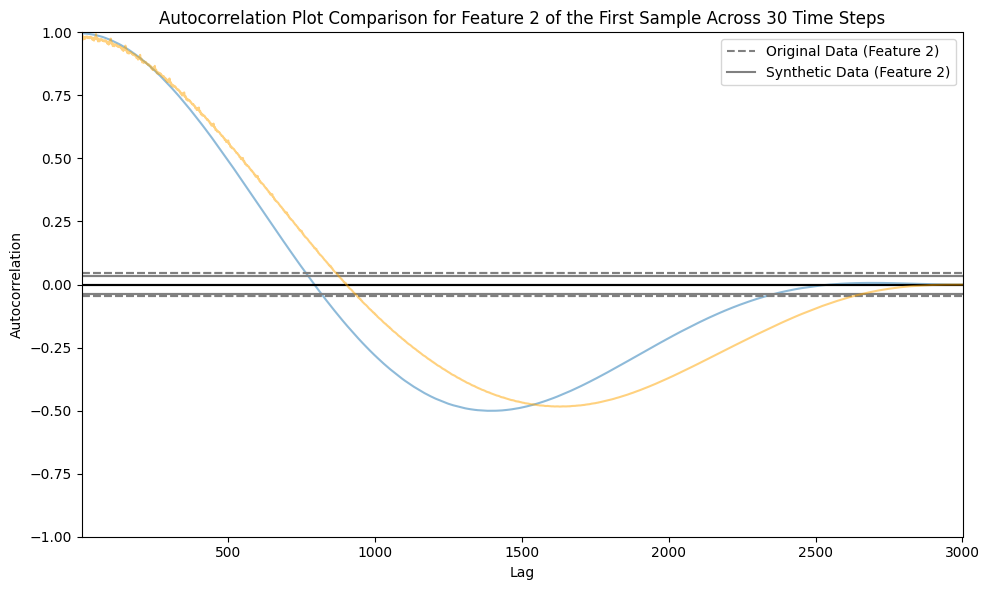

In [ ]:
# Calculate the average along the first axis (((((((((all to one)))))))))
averaged_features2 = synthetic_features.mean(axis=0)
# Print the new shape
print("New shape:", averaged_features2.shape)

averaged_features = features.mean(axis=0)
# Print the new shape
print("New shape:", averaged_features.shape)


from pandas.plotting import autocorrelation_plot
plt.figure(figsize=(10, 6))
autocorrelation_plot(pd.Series(averaged_features[:, 0]), label='Original Data (Feature 1)', alpha=0.5)
autocorrelation_plot(pd.Series(averaged_features2[:, 0]), label='Synthetic Data (Feature 1)', color='orange', alpha=0.5)

# Add legend and adjust layout for Feature 1
plt.legend(['Original Data (Feature 1)', 'Synthetic Data (Feature 1)'])
plt.title('Autocorrelation Plot Comparison for Feature 1 of the First Sample Across 30 Time Steps')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
autocorrelation_plot(pd.Series(averaged_features[ :, 1]), label='Original Data (Feature 2)', alpha=0.5)
autocorrelation_plot(pd.Series(averaged_features2[ :, 1]), label='Synthetic Data (Feature 2)', color='orange', alpha=0.5)

# Add legend and adjust layout for Feature 2
plt.legend(['Original Data (Feature 2)', 'Synthetic Data (Feature 2)'])
plt.title('Autocorrelation Plot Comparison for Feature 2 of the First Sample Across 30 Time Steps')
plt.tight_layout()
plt.show()



(100,)
(100,)


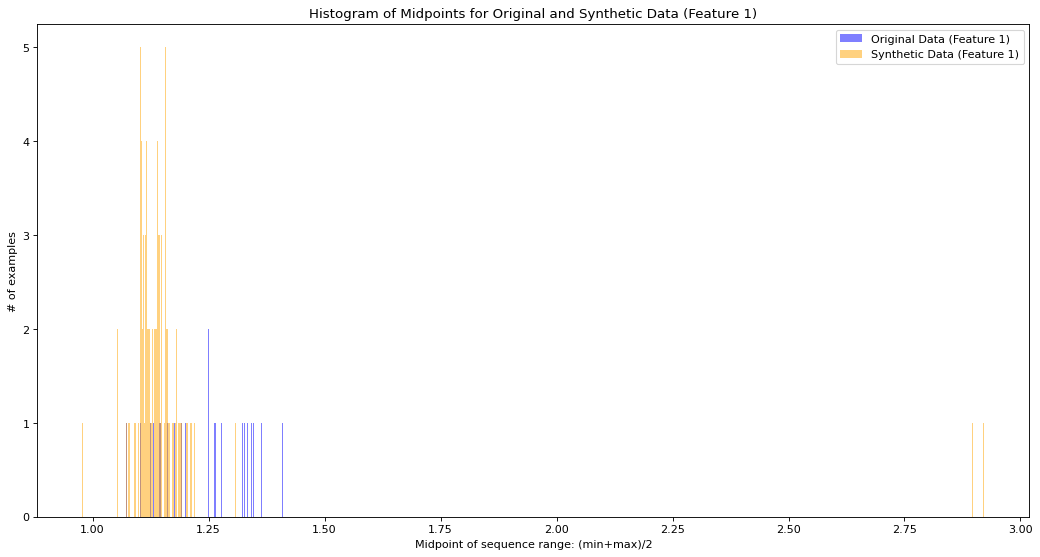

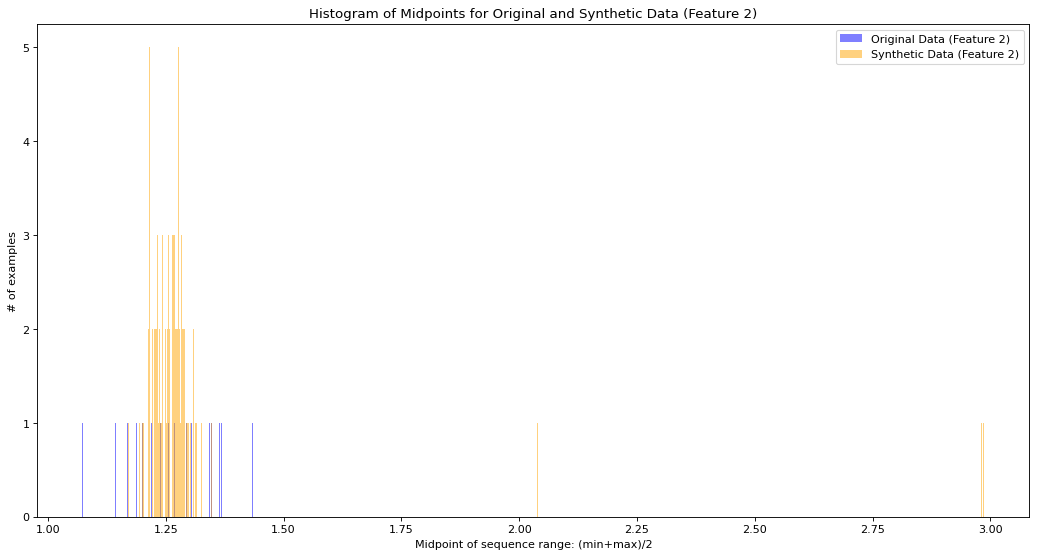

In [ ]:
#2 min max /2
# Calculate midpoints for original and synthetic data (Feature 1 and Feature 2 separately)
original_midpoints_feature1 = (features[:, :, 0].min(axis=1) + features[:, :, 0].max(axis=1)) / 2
synthetic_midpoints_feature1 = (synthetic_features[:, :, 0].min(axis=1) + synthetic_features[:, :, 0].max(axis=1)) / 2

original_midpoints_feature2 = (features[:, :, 1].min(axis=1) + features[:, :, 1].max(axis=1)) / 2
synthetic_midpoints_feature2 = (synthetic_features[:, :, 1].min(axis=1) + synthetic_features[:, :, 1].max(axis=1)) / 2
print(original_midpoints_feature1.shape)
print(synthetic_midpoints_feature1.shape)

# Plot histogram of midpoints for Feature 1
plt.figure(figsize=(16, 8), dpi=80)
plt.hist(original_midpoints_feature1, bins=1000, alpha=0.5, label="Original Data (Feature 1)", color='blue')
plt.hist(synthetic_midpoints_feature1, bins=1000, alpha=0.5, label="Synthetic Data (Feature 1)", color='orange')

# Add labels, title, and legend for Feature 1
plt.xlabel("Midpoint of sequence range: (min+max)/2")
plt.ylabel("# of examples")
plt.title("Histogram of Midpoints for Original and Synthetic Data (Feature 1)")
plt.legend(loc="upper right")

# Save and display the plot for Feature 1
plt.savefig("midpoints_feature1.png")
plt.show()

# Plot histogram of midpoints for Feature 2
plt.figure(figsize=(16, 8), dpi=80)
plt.hist(original_midpoints_feature2, bins=1000, alpha=0.5, label="Original Data (Feature 2)", color='blue')
plt.hist(synthetic_midpoints_feature2, bins=1000, alpha=0.5, label="Synthetic Data (Feature 2)", color='orange')

# Add labels, title, and legend for Feature 2
plt.xlabel("Midpoint of sequence range: (min+max)/2")
plt.ylabel("# of examples")
plt.title("Histogram of Midpoints for Original and Synthetic Data (Feature 2)")
plt.legend(loc="upper right")

# Save and display the plot for Feature 2
plt.savefig("midpoints_feature2.png")
plt.show()


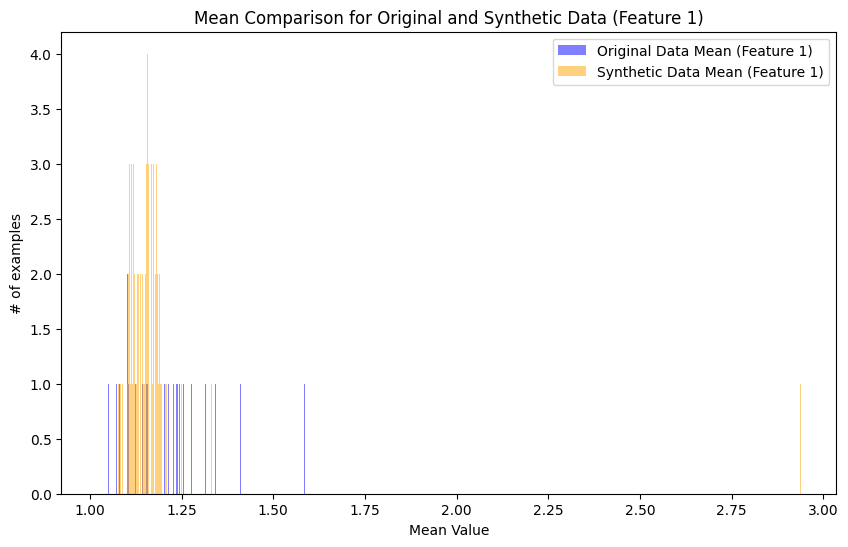

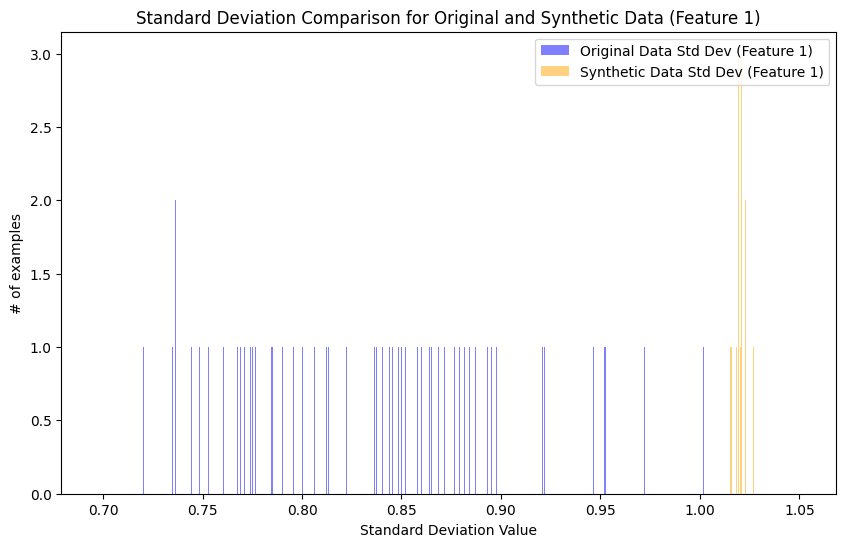

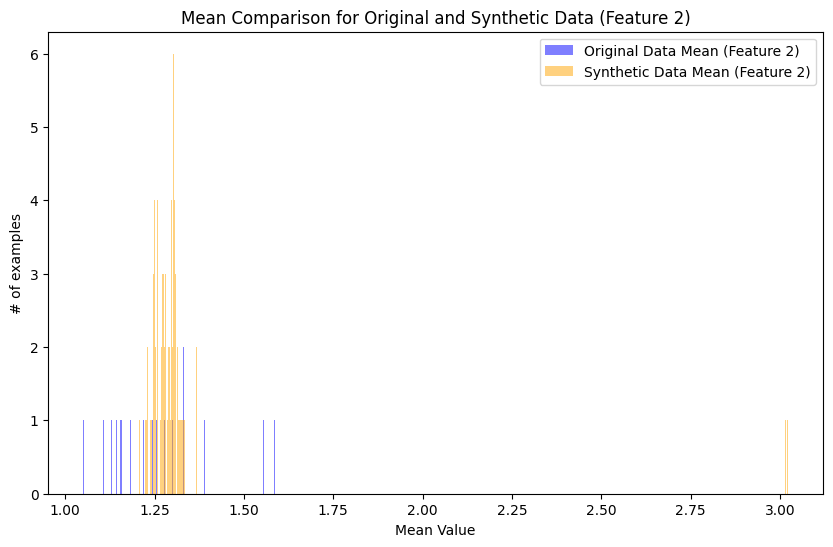

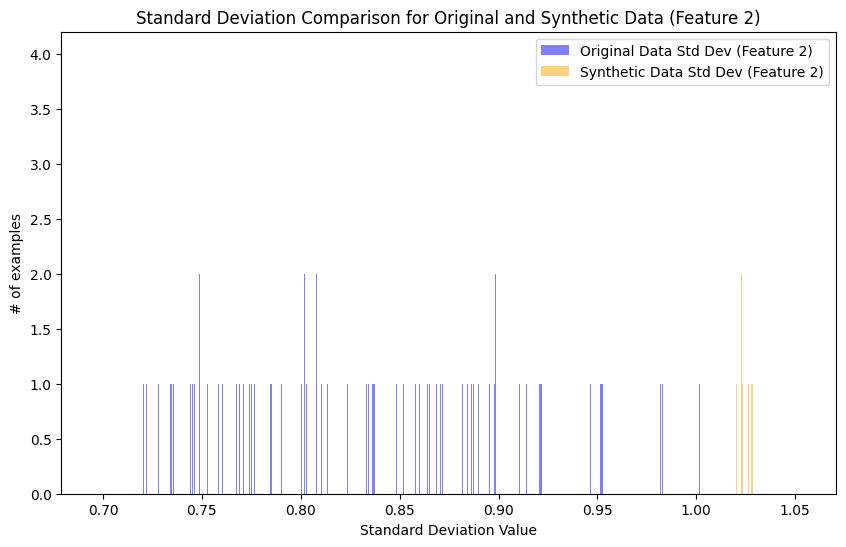

In [ ]:
# Calculate mean and standard deviation for original and synthetic data (Feature 1 and Feature 2 separately)
original_mean_feature1 = features[:, :, 0].mean(axis=1)
synthetic_mean_feature1 = synthetic_features[:, :, 0].mean(axis=1)

original_std_feature1 = features[:, :, 0].std(axis=1)
synthetic_std_feature1 = synthetic_features[:, :, 0].std(axis=1)

original_mean_feature2 = features[:, :, 1].mean(axis=1)
synthetic_mean_feature2 = synthetic_features[:, :, 1].mean(axis=1)

original_std_feature2 = features[:, :, 1].std(axis=1)
synthetic_std_feature2 = synthetic_features[:, :, 1].std(axis=1)

# Plot mean comparison for Feature 1
plt.figure(figsize=(10, 6))
plt.hist(original_mean_feature1, bins=1000, alpha=0.5, label="Original Data Mean (Feature 1)", color='blue')
plt.hist(synthetic_mean_feature1, bins=1000, alpha=0.5, label="Synthetic Data Mean (Feature 1)", color='orange')
plt.xlabel("Mean Value")
plt.ylabel("# of examples")
plt.title("Mean Comparison for Original and Synthetic Data (Feature 1)")
plt.legend(loc="upper right")
plt.show()

# Plot standard deviation comparison for Feature 1
plt.figure(figsize=(10, 6))
plt.hist(original_std_feature1, bins=1000, alpha=0.5, label="Original Data Std Dev (Feature 1)", color='blue')
plt.hist(synthetic_std_feature1, bins=1000, alpha=0.5, label="Synthetic Data Std Dev (Feature 1)", color='orange')
plt.xlabel("Standard Deviation Value")
plt.ylabel("# of examples")
plt.title("Standard Deviation Comparison for Original and Synthetic Data (Feature 1)")
plt.legend(loc="upper right")
plt.show()

# Plot mean comparison for Feature 2
plt.figure(figsize=(10, 6))
plt.hist(original_mean_feature2, bins=1000, alpha=0.5, label="Original Data Mean (Feature 2)", color='blue')
plt.hist(synthetic_mean_feature2, bins=1000, alpha=0.5, label="Synthetic Data Mean (Feature 2)", color='orange')
plt.xlabel("Mean Value")
plt.ylabel("# of examples")
plt.title("Mean Comparison for Original and Synthetic Data (Feature 2)")
plt.legend(loc="upper right")
plt.show()

# Plot standard deviation comparison for Feature 2
plt.figure(figsize=(10, 6))
plt.hist(original_std_feature2, bins=1000, alpha=0.5, label="Original Data Std Dev (Feature 2)", color='blue')
plt.hist(synthetic_std_feature2, bins=1000, alpha=0.5, label="Synthetic Data Std Dev (Feature 2)", color='orange')
plt.xlabel("Standard Deviation Value")
plt.ylabel("# of examples")
plt.title("Standard Deviation Comparison for Original and Synthetic Data (Feature 2)")
plt.legend(loc="upper right")
plt.show()

In [ ]:
########################################################################################################################################################
########################################################################################################################################################
########################################################################################################################################################
#Real test data (pending) shape=(1450, 30000, 3)

#load the data from drive
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

directory = 'Colab Notebooks/FYP/data/'  # Change this to your path
import os
#2 load the np file created from another colab notebook
# Load the .npy file
features = np.load('/content/drive/MyDrive/Colab Notebooks/FYP/data/extracted_data3.npy', allow_pickle=True)


Mounted at /content/drive


In [ ]:
print(features.shape)

(401, 30000, 3)


330


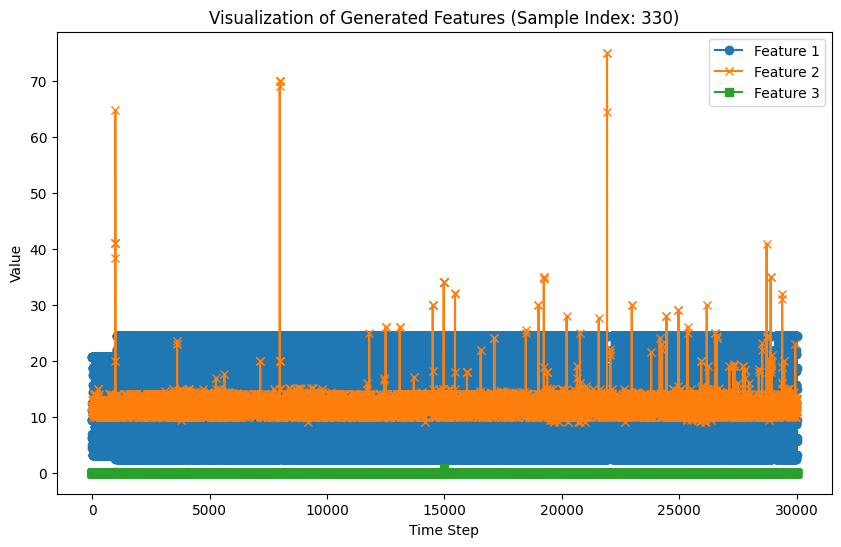

In [ ]:
#Plot the data randomly

import matplotlib.pyplot as plt

# Select a random sample from the generated features
random_index = np.random.randint(0, features.shape[0])
print(random_index)
selected_feature = features[random_index]

# Plot the selected feature
plt.figure(figsize=(10, 6))
plt.plot(selected_feature[:, 0], label='Feature 1', marker='o')
plt.plot(selected_feature[:, 1], label='Feature 2', marker='x')
plt.plot(selected_feature[:, 2], label='Feature 3', marker='s')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.title(f'Visualization of Generated Features (Sample Index: {random_index})')
plt.legend()
plt.show()

In [ ]:
# Train the model
model = DGAN(DGANConfig(

    max_sequence_len=30000,
    sample_len=300,
    use_attribute_discriminator=True,
    gradient_penalty_coef=10.0,
    attribute_gradient_penalty_coef=10.0,
    generator_learning_rate=5e-3,
    discriminator_learning_rate=5e-3,
    attribute_discriminator_learning_rate=5e-3,#1e-3
    attribute_loss_coef=1.0,
    apply_feature_scaling=True,
    apply_example_scaling=True,
    normalization=Normalization.MINUSONE_ONE,
    batch_size=6000,
    epochs=100, #100 first to test the time, target:1000 1HOUR 3 CORE
    #original 400

    #data para in compare_data.ipynb
))



In [ ]:
model = DGAN(DGANConfig(
    max_sequence_len=30000,
    sample_len=300,
    use_attribute_discriminator=True,
    gradient_penalty_coef=10.0,
    attribute_gradient_penalty_coef=10.0,
    generator_learning_rate=1e-3,
    discriminator_learning_rate=1e-3,
    attribute_discriminator_learning_rate=1e-3,
    attribute_loss_coef=1.0,
    apply_feature_scaling=True,
    apply_example_scaling=True,
    normalization=Normalization.MINUSONE_ONE,
    batch_size=6000,
    epochs=400,
))
model.train_numpy(features=features,)

In [ ]:
model.train_numpy(

    features=features,
    #feature_types = [OutputType.CONTINUOUS] * 2
)

/usr/local/lib/python3.11/dist-packages/gretel_synthetics/timeseries_dgan/dgan.py:688: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler(enabled=self.config.mixed_precision_training)
/usr/local/lib/python3.11/dist-packages/gretel_synthetics/timeseries_dgan/dgan.py:696: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(
/usr/local/lib/python3.11/dist-packages/gretel_synthetics/timeseries_dgan/dgan.py:719: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=True):
/usr/local/lib/python3.11/dist-packages/gretel_synthetics/timeseries_dgan/dgan.py:743: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` inst

In [ ]:
# Generate synthetic data
synthetic_features_0 = model.generate_numpy(401)

In [ ]:
synthetic_features=synthetic_features_0[1]
print(synthetic_features.shape)

(401, 30000, 3)


Visualizing the best sample 2 with index: 3


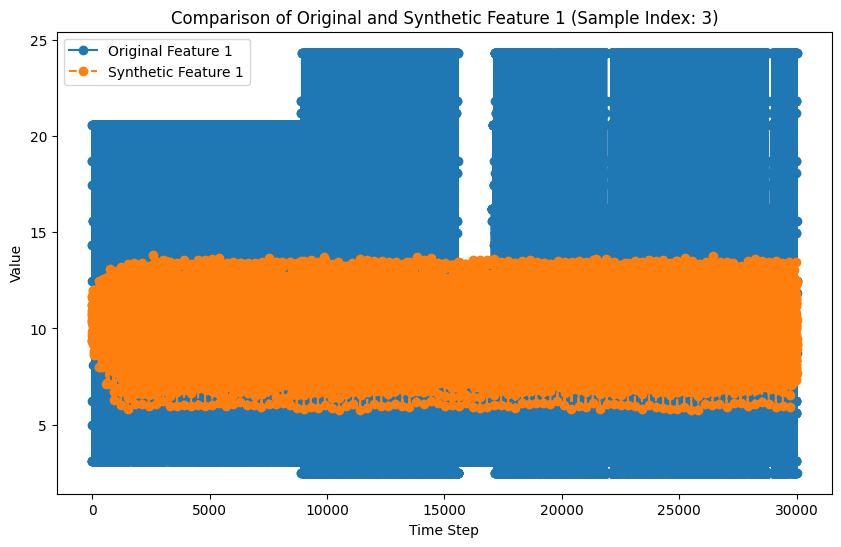

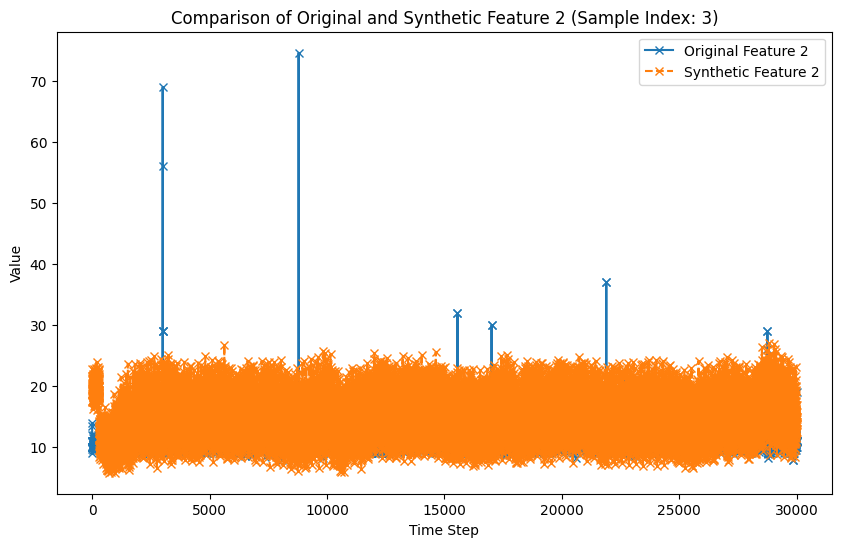

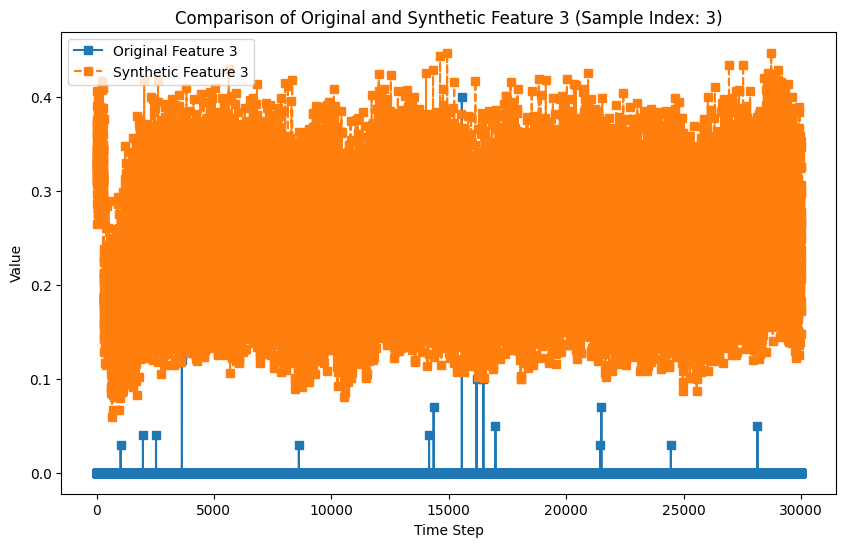

In [ ]:
## compare result first

# Find n best samples by comparing the sum of absolute differences between original and synthetic features
n = 9999  # Number of best samples to find
differences = [np.sum(np.abs(features[i] - synthetic_features[i])) for i in range(len(synthetic_features))]
best_samples = np.argsort(differences)[:n]

# Visualize the original and synthetic features for the best samples
import matplotlib.pyplot as plt

#for idx, sample_index in enumerate(best_samples):
x=1       ###########
y=best_samples[x]

print(f"Visualizing the best sample {x + 1} with index: {y}")
original_feature = features[y]
synthetic_feature = synthetic_features[y]

# Plot Feature 1
plt.figure(figsize=(10, 6))
plt.plot(original_feature[:, 0], label='Original Feature 1', marker='o')
plt.plot(synthetic_feature[:, 0], label='Synthetic Feature 1', linestyle='--', marker='o')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.title(f'Comparison of Original and Synthetic Feature 1 (Sample Index: {y})')
plt.legend()
plt.show()

# Plot Feature 2
plt.figure(figsize=(10, 6))
plt.plot(original_feature[:, 1], label='Original Feature 2', marker='x')
plt.plot(synthetic_feature[:, 1], label='Synthetic Feature 2', linestyle='--', marker='x')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.title(f'Comparison of Original and Synthetic Feature 2 (Sample Index: {y})')
plt.legend()
plt.show()
# Plot Feature 3
plt.figure(figsize=(10, 6))
plt.plot(original_feature[:, 2], label='Original Feature 3', marker='s')
plt.plot(synthetic_feature[:, 2], label='Synthetic Feature 3', linestyle='--', marker='s')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.title(f'Comparison of Original and Synthetic Feature 3 (Sample Index: {y})')
plt.legend()
plt.show()

In [ ]:
#1 autocorrelation graph

#2 midpoint sequence range
#2.2 mean and sd

#3 top 3 similar

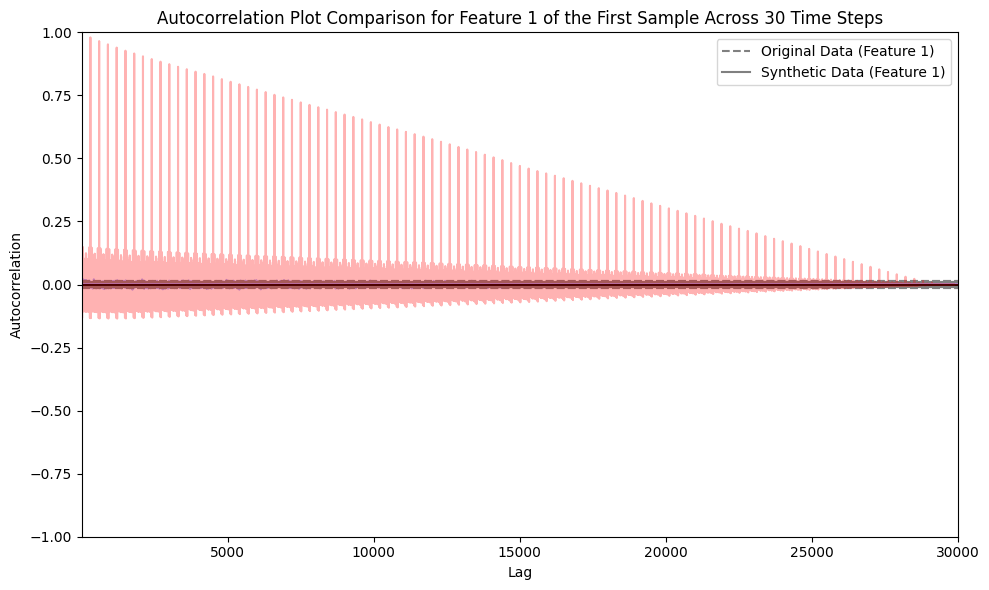

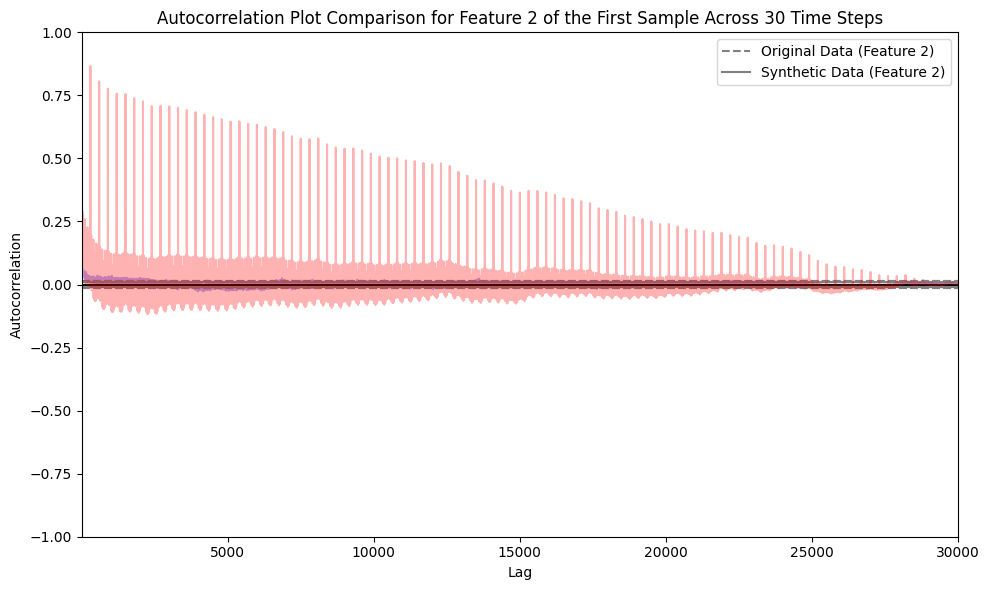

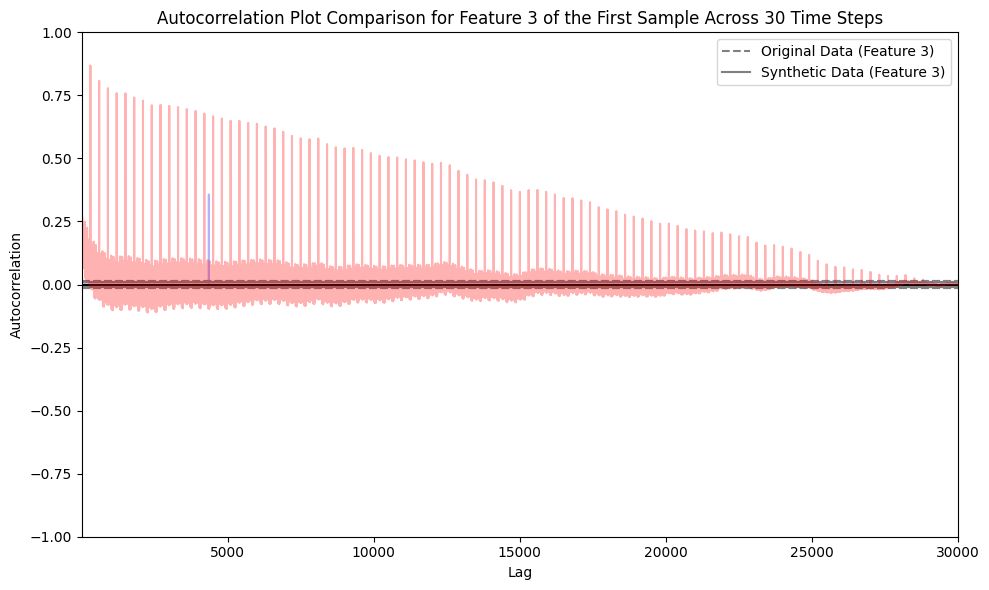

In [ ]:

#comparison test
#1 auto
# Adjust transparency and make use of the whole graph for the new data format

y=0
from pandas.plotting import autocorrelation_plot
plt.figure(figsize=(10, 6))
autocorrelation_plot(pd.Series(features[y, :, 0]), label='Original Data (Feature 1)',color='blue', alpha=0.3)
autocorrelation_plot(pd.Series(synthetic_features[y, :, 0]), label='Synthetic Data (Feature 1)', color='red', alpha=0.3)

# Add legend and adjust layout for Feature 1
plt.legend(['Original Data (Feature 1)', 'Synthetic Data (Feature 1)'])
plt.title('Autocorrelation Plot Comparison for Feature 1 of the First Sample Across 30 Time Steps')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
autocorrelation_plot(pd.Series(features[y, :, 1]), label='Original Data (Feature 2)',color='blue', alpha=0.3)
autocorrelation_plot(pd.Series(synthetic_features[y, :, 1]), label='Synthetic Data (Feature 2)', color='red', alpha=0.3)

# Add legend and adjust layout for Feature 1
plt.legend(['Original Data (Feature 2)', 'Synthetic Data (Feature 2)'])
plt.title('Autocorrelation Plot Comparison for Feature 2 of the First Sample Across 30 Time Steps')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
autocorrelation_plot(pd.Series(features[y, :, 2]), label='Original Data (Feature 3)',color='blue', alpha=0.3)
autocorrelation_plot(pd.Series(synthetic_features[y, :, 2]), label='Synthetic Data (Feature 3)', color='red', alpha=0.3)

# Add legend and adjust layout for Feature 1
plt.legend(['Original Data (Feature 3)', 'Synthetic Data (Feature 3)'])
plt.title('Autocorrelation Plot Comparison for Feature 3 of the First Sample Across 30 Time Steps')
plt.tight_layout()
plt.show()


(401,)
(401,)
(401,)
(401,)


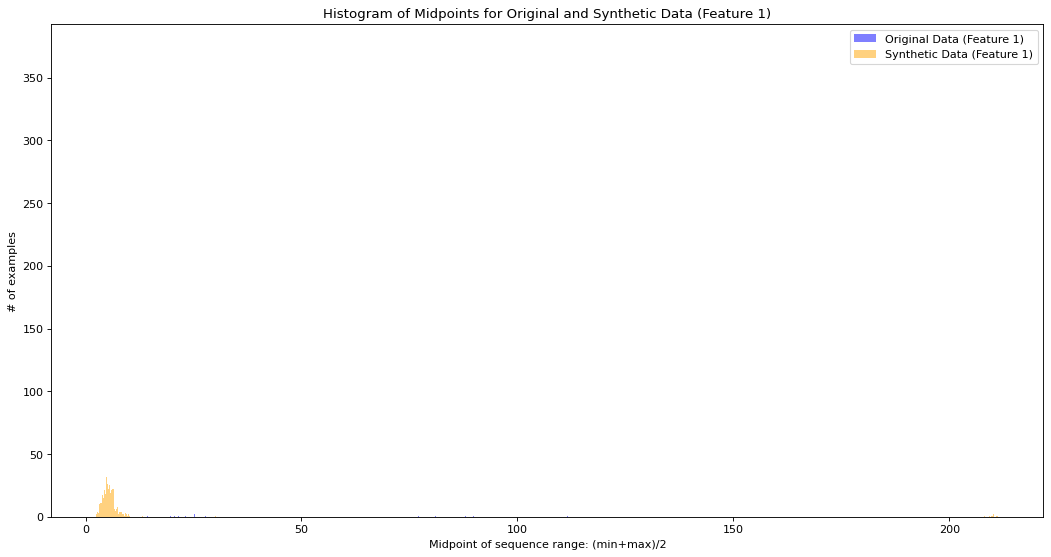

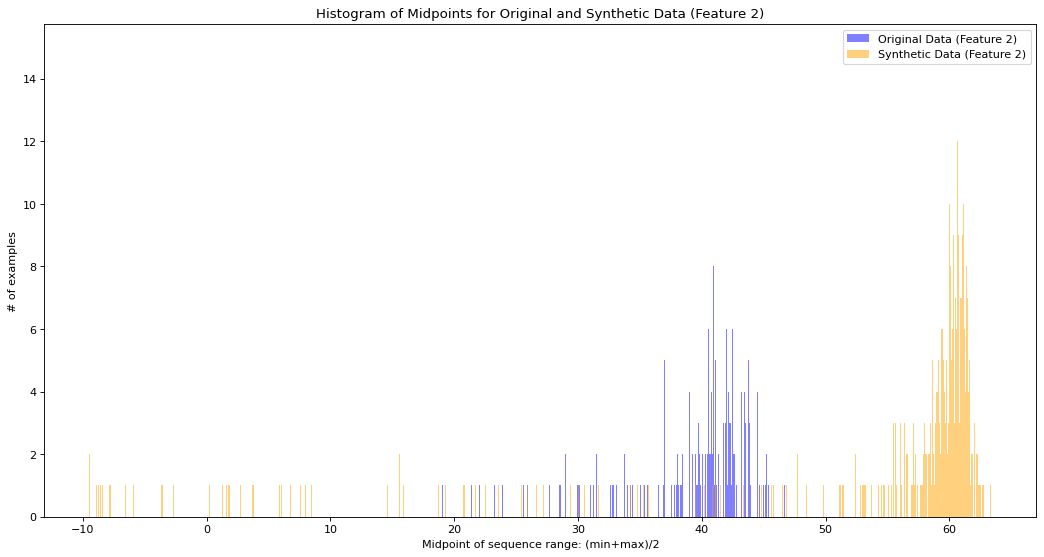

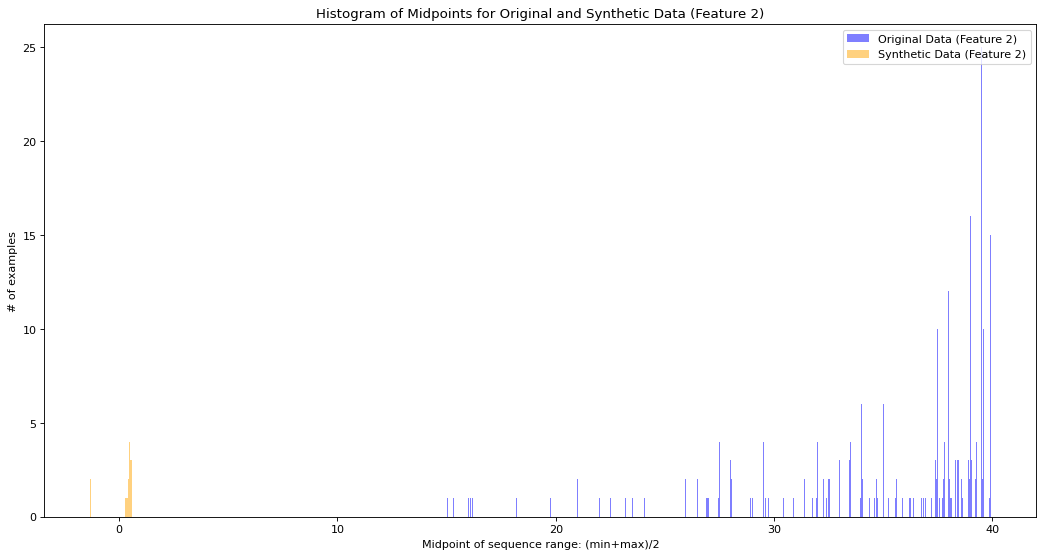

In [ ]:
#2 min max /2
# Calculate midpoints for original and synthetic data (Feature 1 and Feature 2 separately)
original_midpoints_feature1 = (features[:, :, 0].min(axis=1) + features[:, :, 0].max(axis=1)) / 2
synthetic_midpoints_feature1 = (synthetic_features[:, :, 0].min(axis=1) + synthetic_features[:, :, 0].max(axis=1)) / 2

original_midpoints_feature2 = (features[:, :, 1].min(axis=1) + features[:, :, 1].max(axis=1)) / 2
synthetic_midpoints_feature2 = (synthetic_features[:, :, 1].min(axis=1) + synthetic_features[:, :, 1].max(axis=1)) / 2
print(original_midpoints_feature1.shape)
print(synthetic_midpoints_feature1.shape)

original_midpoints_feature3 = (features[:, :, 2].min(axis=1) + features[:, :, 1].max(axis=1)) / 2
synthetic_midpoints_feature3 = (synthetic_features[:, :, 2].min(axis=1) + synthetic_features[:, :, 2].max(axis=1)) / 2
print(original_midpoints_feature1.shape)
print(synthetic_midpoints_feature1.shape)

# Plot histogram of midpoints for Feature 1
plt.figure(figsize=(16, 8), dpi=80)
plt.hist(original_midpoints_feature1, bins=1000, alpha=0.5, label="Original Data (Feature 1)", color='blue')
plt.hist(synthetic_midpoints_feature1, bins=1000, alpha=0.5, label="Synthetic Data (Feature 1)", color='orange')

# Add labels, title, and legend for Feature 1
plt.xlabel("Midpoint of sequence range: (min+max)/2")
plt.ylabel("# of examples")
plt.title("Histogram of Midpoints for Original and Synthetic Data (Feature 1)")
plt.legend(loc="upper right")

# Save and display the plot for Feature 1
plt.savefig("midpoints_feature1.png")
plt.show()

# Plot histogram of midpoints for Feature 2
plt.figure(figsize=(16, 8), dpi=80)
plt.hist(original_midpoints_feature2, bins=1000, alpha=0.5, label="Original Data (Feature 2)", color='blue')
plt.hist(synthetic_midpoints_feature2, bins=1000, alpha=0.5, label="Synthetic Data (Feature 2)", color='orange')

# Add labels, title, and legend for Feature 2
plt.xlabel("Midpoint of sequence range: (min+max)/2")
plt.ylabel("# of examples")
plt.title("Histogram of Midpoints for Original and Synthetic Data (Feature 2)")
plt.legend(loc="upper right")

# Save and display the plot for Feature 2
plt.savefig("midpoints_feature2.png")
plt.show()


# Plot histogram of midpoints for Feature 2
plt.figure(figsize=(16, 8), dpi=80)
plt.hist(original_midpoints_feature3, bins=1000, alpha=0.5, label="Original Data (Feature 2)", color='blue')
plt.hist(synthetic_midpoints_feature3, bins=1000, alpha=0.5, label="Synthetic Data (Feature 2)", color='orange')

# Add labels, title, and legend for Feature 2
plt.xlabel("Midpoint of sequence range: (min+max)/2")
plt.ylabel("# of examples")
plt.title("Histogram of Midpoints for Original and Synthetic Data (Feature 2)")
plt.legend(loc="upper right")

# Save and display the plot for Feature 2
plt.savefig("midpoints_feature2.png")
plt.show()

In [ ]:
###
###
#error
###
###

#2.2
# Calculate mean and standard deviation for original and synthetic data (Feature 1 and Feature 2 separately)
original_mean_feature1 = features[:, :, 0].mean(axis=1)
synthetic_mean_feature1 = synthetic_features[:, :, 0].mean(axis=1)

original_std_feature1 = int(features[:, :, 0]).std(axis=1)
synthetic_std_feature1 = int(synthetic_features[:, :, 0]).std(axis=1)

original_mean_feature2 = features[:, :, 1].mean(axis=1)
synthetic_mean_feature2 = synthetic_features[:, :, 1].mean(axis=1)

original_std_feature2 = int(features[:, :, 1]).std(axis=1)
synthetic_std_feature2 = int(synthetic_features[:, :, 1]).std(axis=1)

# Plot mean comparison for Feature 1
plt.figure(figsize=(10, 6))
plt.hist(original_mean_feature1, bins=1000, alpha=0.5, label="Original Data Mean (Feature 1)", color='blue')
plt.hist(synthetic_mean_feature1, bins=1000, alpha=0.5, label="Synthetic Data Mean (Feature 1)", color='orange')
plt.xlabel("Mean Value")
plt.ylabel("# of examples")
plt.title("Mean Comparison for Original and Synthetic Data (Feature 1)")
plt.legend(loc="upper right")
plt.show()

# Plot standard deviation comparison for Feature 1
plt.figure(figsize=(10, 6))
plt.hist(original_std_feature1, bins=1000, alpha=0.5, label="Original Data Std Dev (Feature 1)", color='blue')
plt.hist(synthetic_std_feature1, bins=1000, alpha=0.5, label="Synthetic Data Std Dev (Feature 1)", color='orange')
plt.xlabel("Standard Deviation Value")
plt.ylabel("# of examples")
plt.title("Standard Deviation Comparison for Original and Synthetic Data (Feature 1)")
plt.legend(loc="upper right")
plt.show()

# Plot mean comparison for Feature 2
plt.figure(figsize=(10, 6))
plt.hist(original_mean_feature2, bins=1000, alpha=0.5, label="Original Data Mean (Feature 2)", color='blue')
plt.hist(synthetic_mean_feature2, bins=1000, alpha=0.5, label="Synthetic Data Mean (Feature 2)", color='orange')
plt.xlabel("Mean Value")
plt.ylabel("# of examples")
plt.title("Mean Comparison for Original and Synthetic Data (Feature 2)")
plt.legend(loc="upper right")
plt.show()

# Plot standard deviation comparison for Feature 2
plt.figure(figsize=(10, 6))
plt.hist(original_std_feature2, bins=1000, alpha=0.5, label="Original Data Std Dev (Feature 2)", color='blue')
plt.hist(synthetic_std_feature2, bins=1000, alpha=0.5, label="Synthetic Data Std Dev (Feature 2)", color='orange')
plt.xlabel("Standard Deviation Value")
plt.ylabel("# of examples")
plt.title("Standard Deviation Comparison for Original and Synthetic Data (Feature 2)")
plt.legend(loc="upper right")
plt.show()

In [ ]:
print(synthetic_features[100,:,2])

[0.33035603 0.33221495 0.33032627 ... 0.3521632  0.34873249 0.35068737]


In [ ]:
# Save the generated numpy array to a file
np.save("synthetic_features_8.npy", synthetic_features)

# Optionally, save the original features as well
#np.save("original_features_3.npy", features)

print(features.shape)
print(synthetic_features.shape)
print("Synthetic features and original features saved successfully.")

(401, 30000, 3)
(401, 30000, 3)
Synthetic features and original features saved successfully.
